<a href="https://colab.research.google.com/github/mary-ts/Neural-Computing/blob/padi/lenet5%20xception%20mashup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers as layers
from keras import Sequential
import keras.models
from keras.layers import *
from keras.models import * 
from keras import optimizers, applications
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

Dataset Paths

In [2]:
train_path = "/content/drive/MyDrive/CNN IMAGES/Fruit_dataset/MY_data/train"
test_path = "/content/drive/MyDrive/CNN IMAGES/Fruit_dataset/MY_data/test"
val_path = "/content/drive/MyDrive/CNN IMAGES/Fruit_dataset/MY_data/predict"

Creating training and test data

In [3]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

val_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

Importing data into generators

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical', 
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 64,
    shuffle=True,
    class_mode = 'categorical')

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'categorical')

Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.
Found 0 images belonging to 0 classes.


LeNet5 Model

In [5]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(224,224,1)))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 46656)             0         
                                                                 
 dense (Dense)               (None, 120)               5

Xception Model

In [5]:
model = applications.Xception(weights='imagenet', 
                              include_top=False, 
                              input_shape=(224, 224, 3))

for layer in model.layers[:-5]:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation="softmax")(x)
model_final = Model(model.input, predictions)

model_final.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])


83683744/83683744 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Xception


In [ ]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=7, verbose=2, mode='auto')
hist = model_final.fit_generator(generator=train_generator,                   
                                    steps_per_epoch=100,
                                    validation_data=test_generator,                    
                                    validation_steps=10,
                                    epochs=10,
                                    callbacks = [checkpoint, early],
                                    verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10


LeNet5

In [ ]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,
                           generator=train_generator, 
                           validation_data= test_generator, 
                           validation_steps=10,
                           epochs=10,
                           callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
  2/100 [..............................] - ETA: 30:35 - loss: 493.2159 - accuracy: 0.1094 

Evaluate model

In [ ]:
model.evaluate(train_generator)

model.evaluate(test_generator)

model.evaluate(val_generator)

576/576 [==============================] - 31s 53ms/step - loss: 2.0504 - true_positives_1: 81.0000


[2.05039381980896, 81.0]

Plot LeNet5




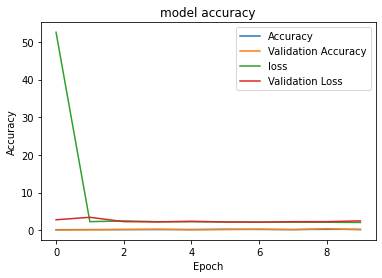

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

Plot Xception

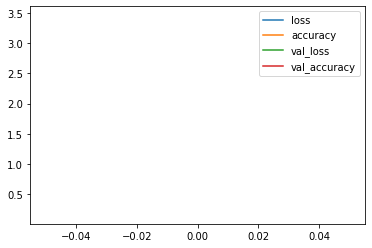

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"])
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_loss"])
plt.plot(hist.history["val_accuracy"])
plt.legend(["loss", "accuracy", "val_loss", "val_accuracy"])
plt.show()

In [ ]:
keras.metrics.TruePositives()